# Assignment 1

In [1]:
name = 'Alina Kitieva' 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
# your code here
def my_function(pos_arg, pos_default_arg=10, *args, kw_arg, kw_default_arg='default', **kwargs):
    """
    Example function demonstrating different types of arguments.

    Parameters:
    pos_arg: positional argument
    pos_default_arg: positional argument with default value (default is 10)
    *args: arbitrary positional arguments
    kw_arg: keyword-only argument
    kw_default_arg: keyword-only argument with default value (default is 'default')
    **kwargs: arbitrary keyword arguments

    Returns:
    dict: a dictionary containing all the arguments
    """
    return {
        'pos_arg': pos_arg,
        'pos_default_arg': pos_default_arg,
        'args': args,
        'kw_arg': kw_arg,
        'kw_default_arg': kw_default_arg,
        'kwargs': kwargs
    }

## Exercise 1


In [3]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    # your code here
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [4]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    # your code here
    if not callable(func):
        raise ValueError("The provided argument is not a function")

    func_name = func.__name__
    signature = inspect.signature(func)
    parameters = signature.parameters

    print(f"Function name: {func_name}")
    for param_name, param in parameters.items():
        if param.default == inspect.Parameter.empty:
            default = None
        else:
            default = param.default

        if param.kind == inspect.Parameter.POSITIONAL_ONLY:
            kind = "Positional only"
        elif param.kind == inspect.Parameter.POSITIONAL_OR_KEYWORD:
            kind = "Positional or keyword"
        elif param.kind == inspect.Parameter.VAR_POSITIONAL:
            kind = "Arbitrary positional (*args)"
        elif param.kind == inspect.Parameter.KEYWORD_ONLY:
            kind = "Keyword only"
        elif param.kind == inspect.Parameter.VAR_KEYWORD:
            kind = "Arbitrary keyword (**kwargs)"
        else:
            kind = "Unknown"

        print(f"Argument name: {param_name}, Type: {kind}, Default: {default}")

inspect_function(my_function)

Function name: my_function
Argument name: pos_arg, Type: Positional or keyword, Default: None
Argument name: pos_default_arg, Type: Positional or keyword, Default: 10
Argument name: args, Type: Arbitrary positional (*args), Default: None
Argument name: kw_arg, Type: Keyword only, Default: None
Argument name: kw_default_arg, Type: Keyword only, Default: default
Argument name: kwargs, Type: Arbitrary keyword (**kwargs), Default: None


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [5]:
from datetime import datetime
from time import sleep
 
 
def my_time_now(msg, *, dt=None):
    if dt is None:
        dt = datetime.utcnow()
    print(msg, dt)
 


In [6]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-07 19:18:08.013232
The time is now:  2024-12-07 19:18:09.018611
The time is now:  2024-12-07 19:18:10.024348


## Exercise 4

In [7]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    count = 0
    for value in input_generator:
        if count >= max_count:
            break
        yield value
        count += 1

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [8]:
# your code here
def pascal_triangle():
    row = [1]
    while True:
        for num in row:
            yield num
        row = [sum(pair) for pair in zip([0] + row, row + [0])]


gen = pascal_triangle()
limited_gen = limit(gen, 20)
print(list(limited_gen))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]


## Exercise 6


In [9]:
import pathlib  # can change to os module if you want
import sys


def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    path = pathlib.Path(path_to_dir)
    files = [f for f in path.iterdir() if f.is_file()]
    files.sort(key=lambda f: (f.stat().st_size, f.name))
    return files

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [10]:
import heapq

def merge_sorter(*args):

    heap = []
    
    for it in map(iter, args):
        try:
            heap.append((next(it), it))
        except StopIteration:
            pass
    
    heapq.heapify(heap)
    
    while heap:
        value, it = heapq.heappop(heap)
        yield value
        try:
            heapq.heappush(heap, (next(it), it))
        except StopIteration:
            pass

gen1 = iter([1, 4, 7])
gen2 = iter([2, 5, 8])
gen3 = iter([3, 6, 9])

merged_gen = merge_sorter(gen1, gen2, gen3)
print(list(merged_gen))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [11]:
import time
from functools import wraps

def profiler(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        if not hasattr(wrapper, 'calls'):
            wrapper.calls = 0
        start_time = time.time()
        wrapper.calls += 1
        result = func(*args, **kwargs)
        end_time = time.time()
        wrapper.last_time_taken = end_time - start_time
        return result
    wrapper.calls = 0
    wrapper.last_time_taken = 0
    return wrapper


@profiler
def ackermann(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackermann(m - 1, 1)
    elif m > 0 and n > 0:
        return ackermann(m - 1, ackermann(m, n - 1))


print(ackermann(2, 3))
print(f"Time taken: {ackermann.last_time_taken} seconds")
print(f"Number of calls: {ackermann.calls}")

9
Time taken: 2.47955322265625e-05 seconds
Number of calls: 44


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [12]:
def encode(sequence):
    if not sequence:
        return []

    encoded_sequence = []
    current_char = sequence[0]
    count = 1

    for char in sequence[1:]:
        if char == current_char:
            count += 1
        else:
            encoded_sequence.append((current_char, count))
            current_char = char
            count = 1

    encoded_sequence.append((current_char, count))
    return encoded_sequence

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

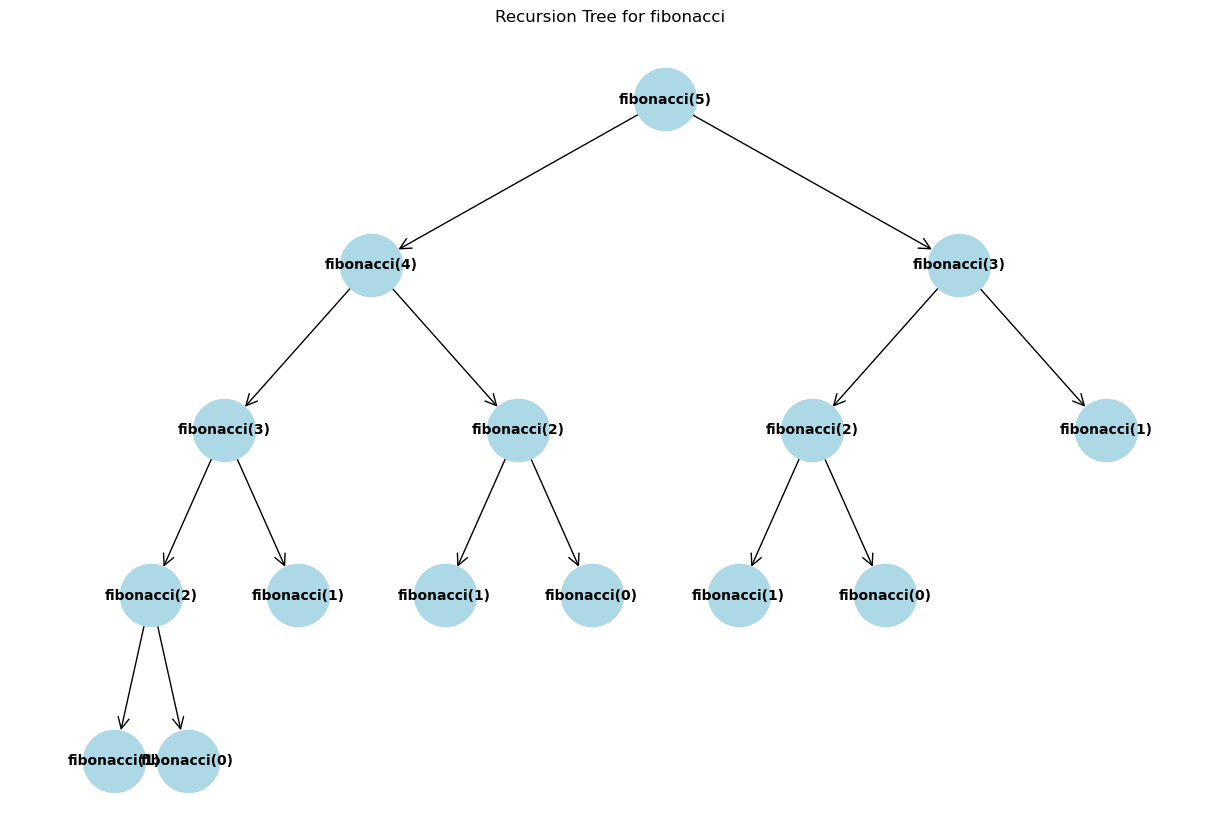

Fibonacci(5) = 5


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from functools import wraps
import itertools

def visualizer(func):
    graph = nx.DiGraph()
    counter = itertools.count()
    stack = []

    @wraps(func)
    def wrapper(*args, **kwargs):
        node_id = next(counter)
        label = f"{func.__name__}({', '.join(map(str, args))})"
        graph.add_node(node_id, label=label)

        if stack:
            parent_id = stack[-1]
            graph.add_edge(parent_id, node_id)

        stack.append(node_id)
        result = func(*args, **kwargs)
        stack.pop()

        if not stack:
            pos = hierarchy_pos(graph)
            labels = nx.get_node_attributes(graph, 'label')
            plt.figure(figsize=(12, 8))
            nx.draw(graph, pos, with_labels=True, labels=labels, node_size=2000, node_color='lightblue', 
                    arrows=True, arrowstyle='->', arrowsize=20, font_size=10, font_weight='bold')
            plt.title(f"Recursion Tree for {func.__name__}")
            plt.show()

        return result

    return wrapper

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    if not nx.is_tree(G):
        raise TypeError('Cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        root = next(iter(nx.topological_sort(G)))

    def _hierarchy_pos(G, root, left, right, vert_loc, pos, parent=None):
        children = list(G.successors(root))
        if not children:
            pos[root] = ( (left + right) / 2, vert_loc)
        else:
            width = (right - left) / len(children)
            for i, child in enumerate(children):
                next_left = left + i * width
                next_right = left + (i + 1) * width
                _hierarchy_pos(G, child, next_left, next_right, vert_loc - vert_gap, pos, root)
            pos[root] = ( (left + right) / 2, vert_loc)
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_loc, {})

@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

n = 5
print(f"Fibonacci({n}) = {fibonacci(n)}")


## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

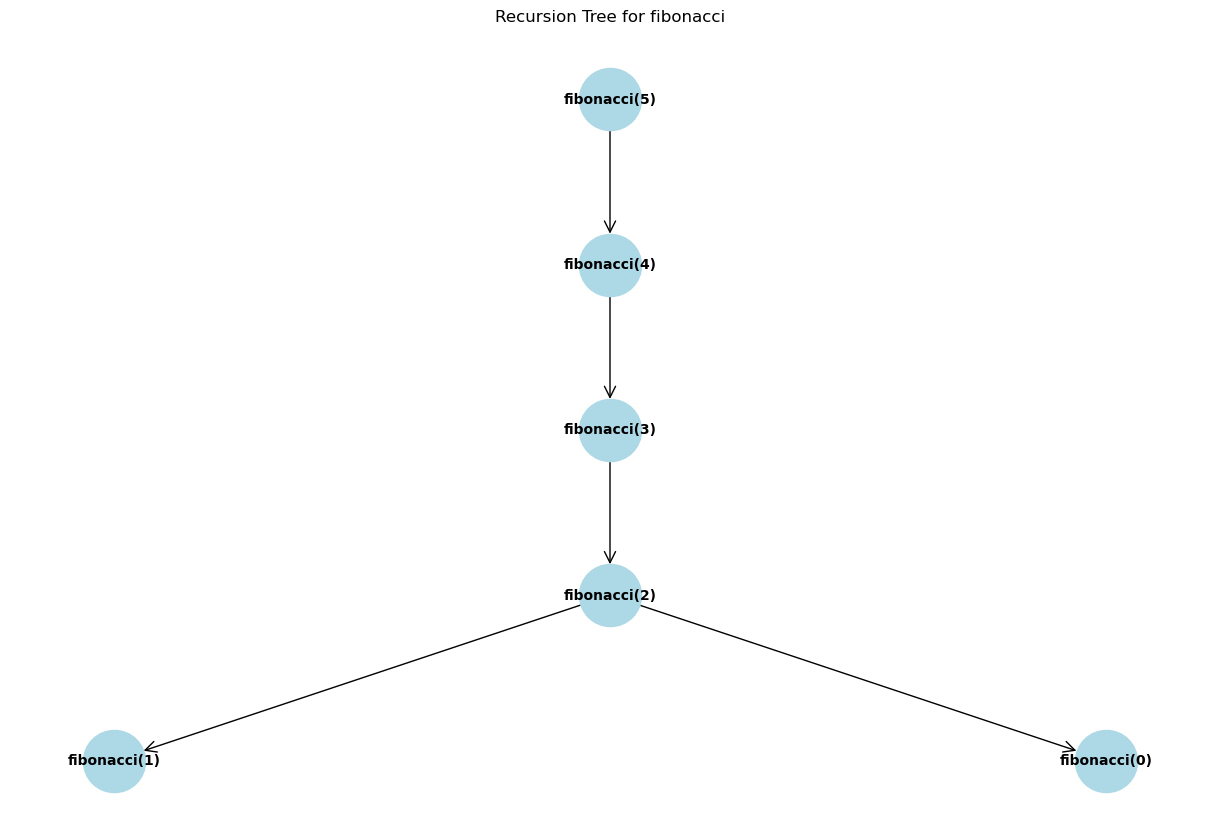

Fibonacci(5) = 5

Profiler Report for fibonacci:
Time taken: 0.18820810317993164 seconds
Number of calls: 9

Memoizer Cache Contents:
fibonacci((1,), ()) = 1
fibonacci((0,), ()) = 0
fibonacci((2,), ()) = 1
fibonacci((3,), ()) = 2
fibonacci((4,), ()) = 3
fibonacci((5,), ()) = 5


In [14]:
def memoizer(func):
    cache = {}

    @wraps(func)
    def wrapper(*args, **kwargs):
        # Create a key based on the function's arguments
        key = (args, tuple(sorted(kwargs.items())))
        if key in cache:
            return cache[key]
        else:
            result = func(*args, **kwargs)
            cache[key] = result
            return result

    wrapper.cache = cache
    return wrapper


@profiler
@memoizer
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

n = 5
print(f"Fibonacci({n}) = {fibonacci(n)}")

print(f"\nProfiler Report for {fibonacci.__name__}:")
print(f"Time taken: {fibonacci.last_time_taken} seconds")
print(f"Number of calls: {fibonacci.calls}")

print(f"\nMemoizer Cache Contents:")
for args, result in fibonacci.cache.items():
    print(f"fibonacci{args} = {result}")

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [15]:
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

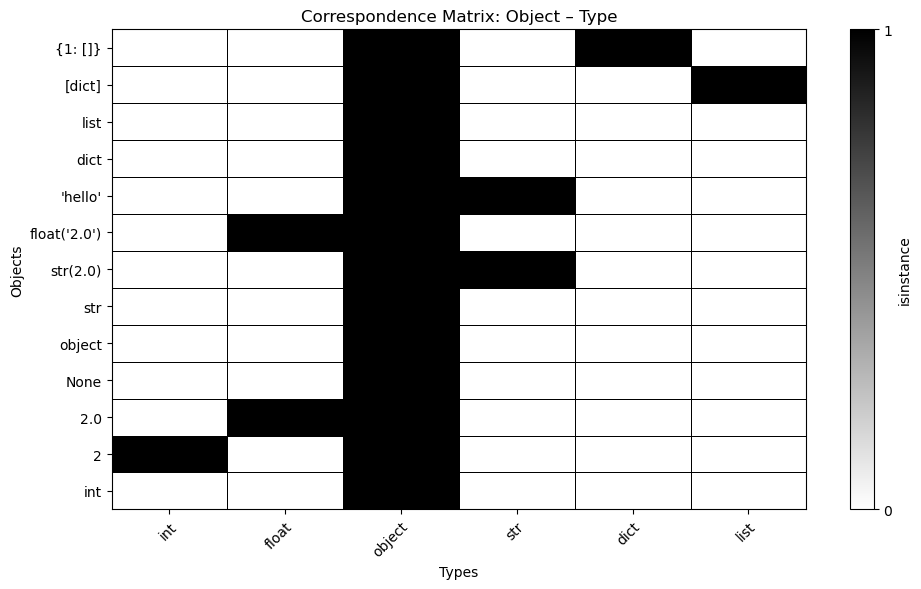

In [16]:
import numpy as np
import matplotlib.pyplot as plt

correspondence_matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

for i, obj in enumerate(list_of_objects):
    for j, typ in enumerate(list_of_types):
        if isinstance(obj, type):
            correspondence_matrix[i, j] = int(isinstance(obj, typ))
        else:
            correspondence_matrix[i, j] = int(isinstance(obj, typ))

object_labels = [
    'int', '2', '2.0', 'None', 'object', 'str', 'str(2.0)', 'float(\'2.0\')',
    "'hello'", 'dict', 'list', '[dict]', '{1: []}'
]

type_labels = [t.__name__ for t in list_of_types]
fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.cm.binary
c = ax.pcolormesh(correspondence_matrix, cmap=cmap, edgecolors='k', linewidth=0.5)

ax.set_xticks(np.arange(len(list_of_types)) + 0.5, minor=False)
ax.set_yticks(np.arange(len(list_of_objects)) + 0.5, minor=False)

ax.set_xticklabels(type_labels)
ax.set_yticklabels(object_labels)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_xlabel('Types')
ax.set_ylabel('Objects')
ax.set_title('Correspondence Matrix: Object – Type')
fig.colorbar(c, ax=ax, ticks=[0, 1], label='isinstance')
plt.tight_layout()

plt.show()
